In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

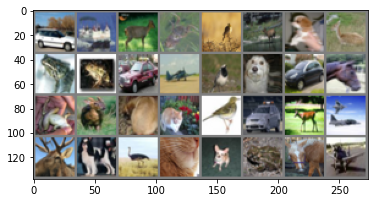

car   ship  deer  frog  bird  deer  dog   deer  frog  frog  car   plane bird  dog   car   horse frog  deer  dog   cat   bird  car   deer  plane deer  dog   bird  cat   dog   frog  horse plane


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import numpy as np

def setup_seed(seed):
     torch.manual_seed(seed)
     torch.cuda.manual_seed_all(seed)
     np.random.seed(seed)
     torch.backends.cudnn.deterministic = True

setup_seed(20)

Model 1

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model1()

In [10]:
#Optimizer

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [38]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model1.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.302
[1,   400] loss: 2.266
[1,   600] loss: 2.193
[1,   800] loss: 2.080
[1,  1000] loss: 1.994
[1,  1200] loss: 1.923
[1,  1400] loss: 1.870
[2,   200] loss: 1.754
[2,   400] loss: 1.712
[2,   600] loss: 1.675
[2,   800] loss: 1.631
[2,  1000] loss: 1.607
[2,  1200] loss: 1.582
[2,  1400] loss: 1.573
Finished Training


In [39]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 43 %


Model 2

In [40]:
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model2()

In [41]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model2.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.299
[1,   400] loss: 2.278
[1,   600] loss: 2.196
[1,   800] loss: 2.039
[1,  1000] loss: 1.961
[1,  1200] loss: 1.893
[1,  1400] loss: 1.840
[2,   200] loss: 1.756
[2,   400] loss: 1.713
[2,   600] loss: 1.654
[2,   800] loss: 1.648
[2,  1000] loss: 1.621
[2,  1200] loss: 1.579
[2,  1400] loss: 1.582
Finished Training


In [43]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 43 %


Model 3

In [44]:
class Model3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 84)
        self.fc2 = nn.Linear(84, 24)
        self.fc3 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Model3()

In [45]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [46]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model3.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.305
[1,   400] loss: 2.303
[1,   600] loss: 2.302
[1,   800] loss: 2.299
[1,  1000] loss: 2.294
[1,  1200] loss: 2.286
[1,  1400] loss: 2.260
[2,   200] loss: 2.078
[2,   400] loss: 2.015
[2,   600] loss: 1.961
[2,   800] loss: 1.933
[2,  1000] loss: 1.915
[2,  1200] loss: 1.872
[2,  1400] loss: 1.831
Finished Training


In [47]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 34 %


Model 4

In [48]:
class Model4(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(F.sigmoid(self.conv1(x)))
        x = self.pool(F.sigmoid(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model4()

In [49]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [50]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model4.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.316
[1,   400] loss: 2.304
[1,   600] loss: 2.303
[1,   800] loss: 2.303
[1,  1000] loss: 2.304
[1,  1200] loss: 2.304
[1,  1400] loss: 2.303
[2,   200] loss: 2.303
[2,   400] loss: 2.303
[2,   600] loss: 2.303
[2,   800] loss: 2.303
[2,  1000] loss: 2.303
[2,  1200] loss: 2.303
[2,  1400] loss: 2.303
Finished Training


In [51]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 10 %


Model 5

In [52]:
class Model5(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.do1 = nn.Dropout(0.15)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.do2 = nn.Dropout(0.15)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.do1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.do2(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model5()

In [53]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [54]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model5.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.301
[1,   400] loss: 2.268
[1,   600] loss: 2.165
[1,   800] loss: 2.089
[1,  1000] loss: 2.031
[1,  1200] loss: 1.983
[1,  1400] loss: 1.902
[2,   200] loss: 1.807
[2,   400] loss: 1.744
[2,   600] loss: 1.713
[2,   800] loss: 1.688
[2,  1000] loss: 1.684
[2,  1200] loss: 1.642
[2,  1400] loss: 1.620
Finished Training


In [55]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 40 %


Model 6

In [56]:
class Model6(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.bn1 = nn.BatchNorm2d(6)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.bn2 = nn.BatchNorm1d(24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.bn2(x)
        x = self.fc2(x)
        return x


net = Model6()

In [57]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [58]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model6.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.066
[1,   400] loss: 1.815
[1,   600] loss: 1.712
[1,   800] loss: 1.621
[1,  1000] loss: 1.537
[1,  1200] loss: 1.506
[1,  1400] loss: 1.447
[2,   200] loss: 1.407
[2,   400] loss: 1.374
[2,   600] loss: 1.366
[2,   800] loss: 1.337
[2,  1000] loss: 1.329
[2,  1200] loss: 1.311
[2,  1400] loss: 1.311
Finished Training


In [59]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 54 %


Model 7

In [60]:
class Model7(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model7()

In [61]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model7.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.299
[1,   400] loss: 2.244
[1,   600] loss: 2.079
[1,   800] loss: 2.012
[1,  1000] loss: 1.924
[1,  1200] loss: 1.847
[1,  1400] loss: 1.796
[2,   200] loss: 1.702
[2,   400] loss: 1.654
[2,   600] loss: 1.596
[2,   800] loss: 1.581
[2,  1000] loss: 1.563
[2,  1200] loss: 1.513
[2,  1400] loss: 1.512
Finished Training


In [63]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 46 %


Model 8

In [11]:
class Model8(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model8()

In [12]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [13]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model8.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.053
[1,   400] loss: 1.771
[1,   600] loss: 1.657
[1,   800] loss: 1.555
[1,  1000] loss: 1.526
[1,  1200] loss: 1.501
[1,  1400] loss: 1.445
[2,   200] loss: 1.412
[2,   400] loss: 1.401
[2,   600] loss: 1.373
[2,   800] loss: 1.371
[2,  1000] loss: 1.360
[2,  1200] loss: 1.353
[2,  1400] loss: 1.280
Finished Training


In [14]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


Model 9

In [15]:
class Model9(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model9()

In [16]:
#Optimizer

criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [17]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.type(torch.float32)
        labels = labels.type(torch.float32)
        loss = criterion(predicted, labels)

        loss.requires_grad_(True)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model9.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 9.459
[1,   400] loss: 9.376
[1,   600] loss: 9.353
[1,   800] loss: 9.087
[1,  1000] loss: 9.304
[1,  1200] loss: 9.291
[1,  1400] loss: 9.271
[2,   200] loss: 9.208
[2,   400] loss: 9.366
[2,   600] loss: 9.390
[2,   800] loss: 9.385
[2,  1000] loss: 9.202
[2,  1200] loss: 9.194
[2,  1400] loss: 9.449
Finished Training


In [18]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 9 %


Model 10

In [19]:
class Model10(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model10()

In [20]:
#Optimizer

criterion = nn.SmoothL1Loss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [21]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        _, predicted = torch.max(outputs, 1)
        predicted = predicted.type(torch.float32)
        labels = labels.type(torch.float32)
        loss = criterion(predicted, labels)

        loss.requires_grad_(True)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model10.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 2.453
[1,   400] loss: 2.481
[1,   600] loss: 2.473
[1,   800] loss: 2.459
[1,  1000] loss: 2.497
[1,  1200] loss: 2.489
[1,  1400] loss: 2.478
[2,   200] loss: 2.493
[2,   400] loss: 2.470
[2,   600] loss: 2.473
[2,   800] loss: 2.468
[2,  1000] loss: 2.476
[2,  1200] loss: 2.477
[2,  1400] loss: 2.460
Finished Training


In [22]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 9 %


Model 11

In [23]:
class Model11(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.res1 = nn.Sequential(nn.Conv2d(16, 16, 3), nn.Conv2d(16, 16, 3))
        self.fc1 = nn.Linear(16 * 5 * 5, 24)
        self.fc2 = nn.Linear(24, 10)

    def forward(self, x):
        x = self.bn1(x)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.res1(x) + x
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = Model11()

In [24]:
#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [25]:
#Train data

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

PATH = './model11.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 1.998
[1,   400] loss: 1.707
[1,   600] loss: 1.604
[1,   800] loss: 1.549
[1,  1000] loss: 1.525
[1,  1200] loss: 1.496
[1,  1400] loss: 1.445
[2,   200] loss: 1.395
[2,   400] loss: 1.358
[2,   600] loss: 1.363
[2,   800] loss: 1.346
[2,  1000] loss: 1.311
[2,  1200] loss: 1.315
[2,  1400] loss: 1.306
Finished Training


In [26]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 50 %


Final Model

In [27]:
class FinalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.bn1 = nn.BatchNorm2d(3)
        self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding = 1)
        self.bn3 = nn.BatchNorm2d(64)
        
        self.res1 = nn.Sequential(nn.Conv2d(64, 64, 3, padding = 1), nn.ReLU(), nn.Conv2d(64, 64, 3, padding = 1), nn.ReLU())

        self.conv3 = nn.Conv2d(64, 128, 3, padding = 1)
        self.bn4 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, 3, padding = 1)
        self.bn5 = nn.BatchNorm2d(256)
        
        self.res2 = nn.Sequential(nn.Conv2d(256, 256, 3, padding = 1), nn.ReLU() , nn.Conv2d(256, 256, 3, padding = 1), nn.ReLU() )

        self.pool = nn.MaxPool2d(2, 2)
        self.pool2 = nn.MaxPool2d(8, 8)
        
        self.fc1 = nn.Linear(256, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.bn1(x)
        
        x = F.relu(self.bn2(self.conv1(x)))
        x = F.relu(self.bn3(self.conv2(x)))
        x = self.pool(x)
        
        x = self.res1(x) + x
        
        x = F.relu(self.bn4(self.conv3(x)))
        x = F.relu(self.bn5(self.conv4(x)))
        x = self.pool(x)
        
        x = self.res2(x) + x
        x = self.pool2(x)
        
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


net = FinalModel()

#Optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [28]:
#Train data

losses = []

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 200 == 199:    # print every 200 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

        losses.append(loss.item())

print('Finished Training')

PATH = './finalModel.pth'
torch.save(net.state_dict(), PATH)

[1,   200] loss: 1.828
[1,   400] loss: 1.527
[1,   600] loss: 1.341
[1,   800] loss: 1.206
[1,  1000] loss: 1.120
[1,  1200] loss: 1.060
[1,  1400] loss: 0.973
[2,   200] loss: 0.845
[2,   400] loss: 0.814
[2,   600] loss: 0.814
[2,   800] loss: 0.805
[2,  1000] loss: 0.777
[2,  1200] loss: 0.752
[2,  1400] loss: 0.743
[3,   200] loss: 0.621
[3,   400] loss: 0.629
[3,   600] loss: 0.627
[3,   800] loss: 0.649
[3,  1000] loss: 0.618
[3,  1200] loss: 0.620
[3,  1400] loss: 0.600
[4,   200] loss: 0.529
[4,   400] loss: 0.520
[4,   600] loss: 0.533
[4,   800] loss: 0.508
[4,  1000] loss: 0.523
[4,  1200] loss: 0.523
[4,  1400] loss: 0.518
[5,   200] loss: 0.443
[5,   400] loss: 0.434
[5,   600] loss: 0.437
[5,   800] loss: 0.481
[5,  1000] loss: 0.447
[5,  1200] loss: 0.463
[5,  1400] loss: 0.459
[6,   200] loss: 0.353
[6,   400] loss: 0.369
[6,   600] loss: 0.363
[6,   800] loss: 0.387
[6,  1000] loss: 0.394
[6,  1200] loss: 0.392
[6,  1400] loss: 0.386
[7,   200] loss: 0.281
[7,   400] 

In [29]:
#Test data

correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 83 %


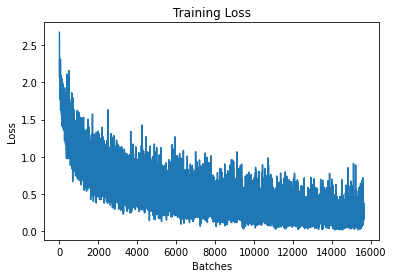

In [30]:
plt.plot(losses)
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()